# Exploratory Data Analysis (EDA) Report

## Project Overview

**Dataset**: Diabetes 130-US Hospitals for Years 1999-2008  
**Data Source**: UCI Machine Learning Repository (ID: 296)  
**Analysis Objective**: Predict diabetes patient readmission  
**Data Scale**: 101,766 instances, 50 features  
**Time Span**: 1999-2008, 130 US hospitals  

## Analysis Objectives

This report aims to gain deep insights into the diabetes dataset through exploratory data analysis (EDA), including feature distributions, data quality, and relationships with target variables, providing data insights and preprocessing guidance for subsequent machine learning modeling.

## Analysis Framework

This EDA analysis will be conducted in the following steps:

1. **Basic Information Exploration** - Understand the basic structure and quality of the dataset
2. **Target Variable Analysis** - Analyze the distribution characteristics of readmission status
3. **Numerical Feature Analysis** - Explore statistical properties and distributions of numerical features
4. **Categorical Feature Analysis** - Analyze distributions and unique value patterns of categorical features
5. **Feature Correlation Analysis** - Identify correlation relationships between features
6. **Feature-Target Relationship Analysis** - Explore the impact of features on target variables
7. **Data Quality Assessment and Summary** - Comprehensive evaluation of data quality and recommendations

## 1. Environment Configuration and Data Loading

### 1.1 Library Import and Environment Setup

First, import the necessary Python libraries, including data processing (pandas, numpy), visualization (matplotlib, seaborn), and data acquisition (ucimlrepo) tools.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)


### 1.2 Data Loading

Prioritize using local cached data to improve analysis efficiency. On first run, automatically download and save data from UCI.

In [2]:
# Data loading function
def load_diabetes_data():
    """Intelligent loading of diabetes dataset"""
    data_dir = "data"
    
    # Check local data
    if all(os.path.exists(f"{data_dir}/diabetes_{file}.csv") 
           for file in ['features', 'targets']):
        print("Loading local data...")
        X = pd.read_csv(f"{data_dir}/diabetes_features.csv")
        y = pd.read_csv(f"{data_dir}/diabetes_targets.csv")
    else:
        print("Downloading data from UCI...")
        os.makedirs(data_dir, exist_ok=True)
        
        dataset = fetch_ucirepo(id=296)
        X = dataset.data.features
        y = dataset.data.targets
        
        # Save to local
        X.to_csv(f"{data_dir}/diabetes_features.csv", index=False)
        y.to_csv(f"{data_dir}/diabetes_targets.csv", index=False)
        print("Data saved to local")
    
    return X, y

# Load data
X, y = load_diabetes_data()
df = pd.concat([X, y], axis=1)

print(f"Data loading completed: {df.shape}")

Loading local data...
Data loading completed: (101766, 48)


## 2. Dataset Basic Information Exploration

### 2.1 Data Overview and Quality Assessment

Conduct comprehensive basic information analysis of the dataset, including data shape, memory usage, data type distribution, and missing value statistics, laying the foundation for subsequent analysis.


In [3]:
# Basic information analysis
def basic_analysis(df):
    """Dataset basic information"""
    print("Dataset Overview")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    print("\nData Types")
    print(df.dtypes.value_counts())
    
    print("\nMissing Values")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(1)
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage (%)': missing_pct
    }).sort_values('Missing Count', ascending=False)
    
    print(missing_df[missing_df['Missing Count'] > 0])
    
    return missing_df

missing_info = basic_analysis(df)


Dataset Overview
Shape: (101766, 48)
Memory usage: 213.9 MB

Data Types
object    37
int64     11
Name: count, dtype: int64

Missing Values
                   Missing Count  Missing Percentage (%)
weight                     98569                    96.9
max_glu_serum              96420                    94.7
A1Cresult                  84748                    83.3
medical_specialty          49949                    49.1
payer_code                 40256                    39.6
race                        2273                     2.2
diag_3                      1423                     1.4
diag_2                       358                     0.4
diag_1                        21                     0.0


## 3. Target Variable Analysis

### 3.1 Readmission Status Distribution Analysis

In-depth analysis of the target variable `readmitted` distribution characteristics, understanding the overall patterns of patient readmission status, including readmission within 30 days, readmission after 30 days, and no readmission proportion distribution.

Target Variable Distribution
NO: 54,864 (53.9%)
>30: 35,545 (34.9%)
<30: 11,357 (11.2%)


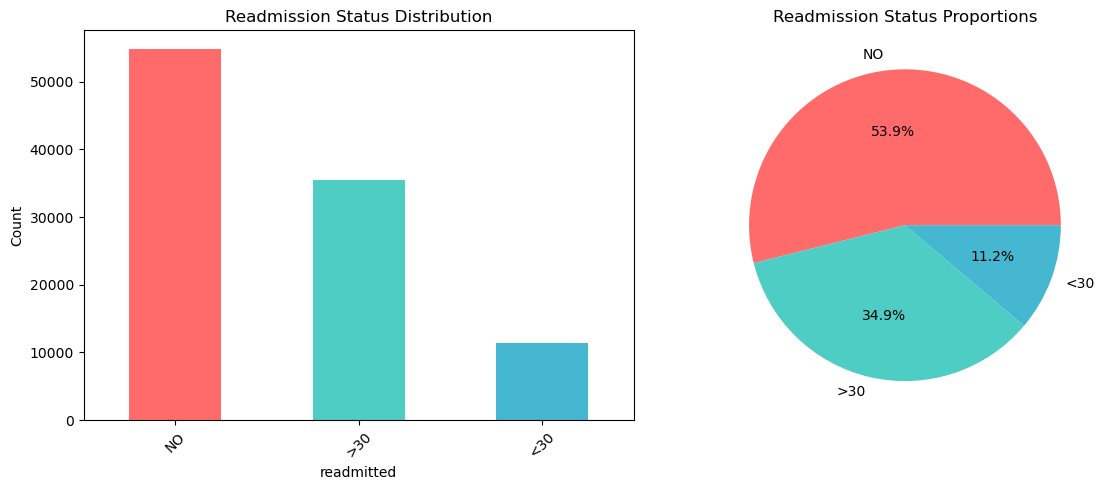

In [4]:
# Target variable analysis
def analyze_target(y):
    """Analyze target variable distribution"""
    target_counts = y['readmitted'].value_counts()
    target_pct = y['readmitted'].value_counts(normalize=True) * 100
    
    print("Target Variable Distribution")
    for category, count in target_counts.items():
        pct = target_pct[category]
        print(f"{category}: {count:,} ({pct:.1f}%)")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    target_counts.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Readmission Status Distribution')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    target_pct.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                   colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_title('Readmission Status Proportions')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    return target_counts

target_dist = analyze_target(y)


## 4. Numerical Feature Analysis

### 4.1 Numerical Feature Statistical Properties

Analyze descriptive statistical information for all numerical features, including key statistics such as mean, median, standard deviation, and visualize the distribution of each feature through histograms.


Numerical features: 11
Features: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Descriptive Statistics
       admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  number_diagnoses
count          101766.00                 101766.00            101766.00         101766.00           101766.00       101766.00        101766.00          101766.00         101766.00         101766.00         101766.00
mean                2.02                      3.72                 5.75              4.40               43.10            1.34            16.02               0.37              0.20              0.64              7.42
std                 1.45                      5.28            

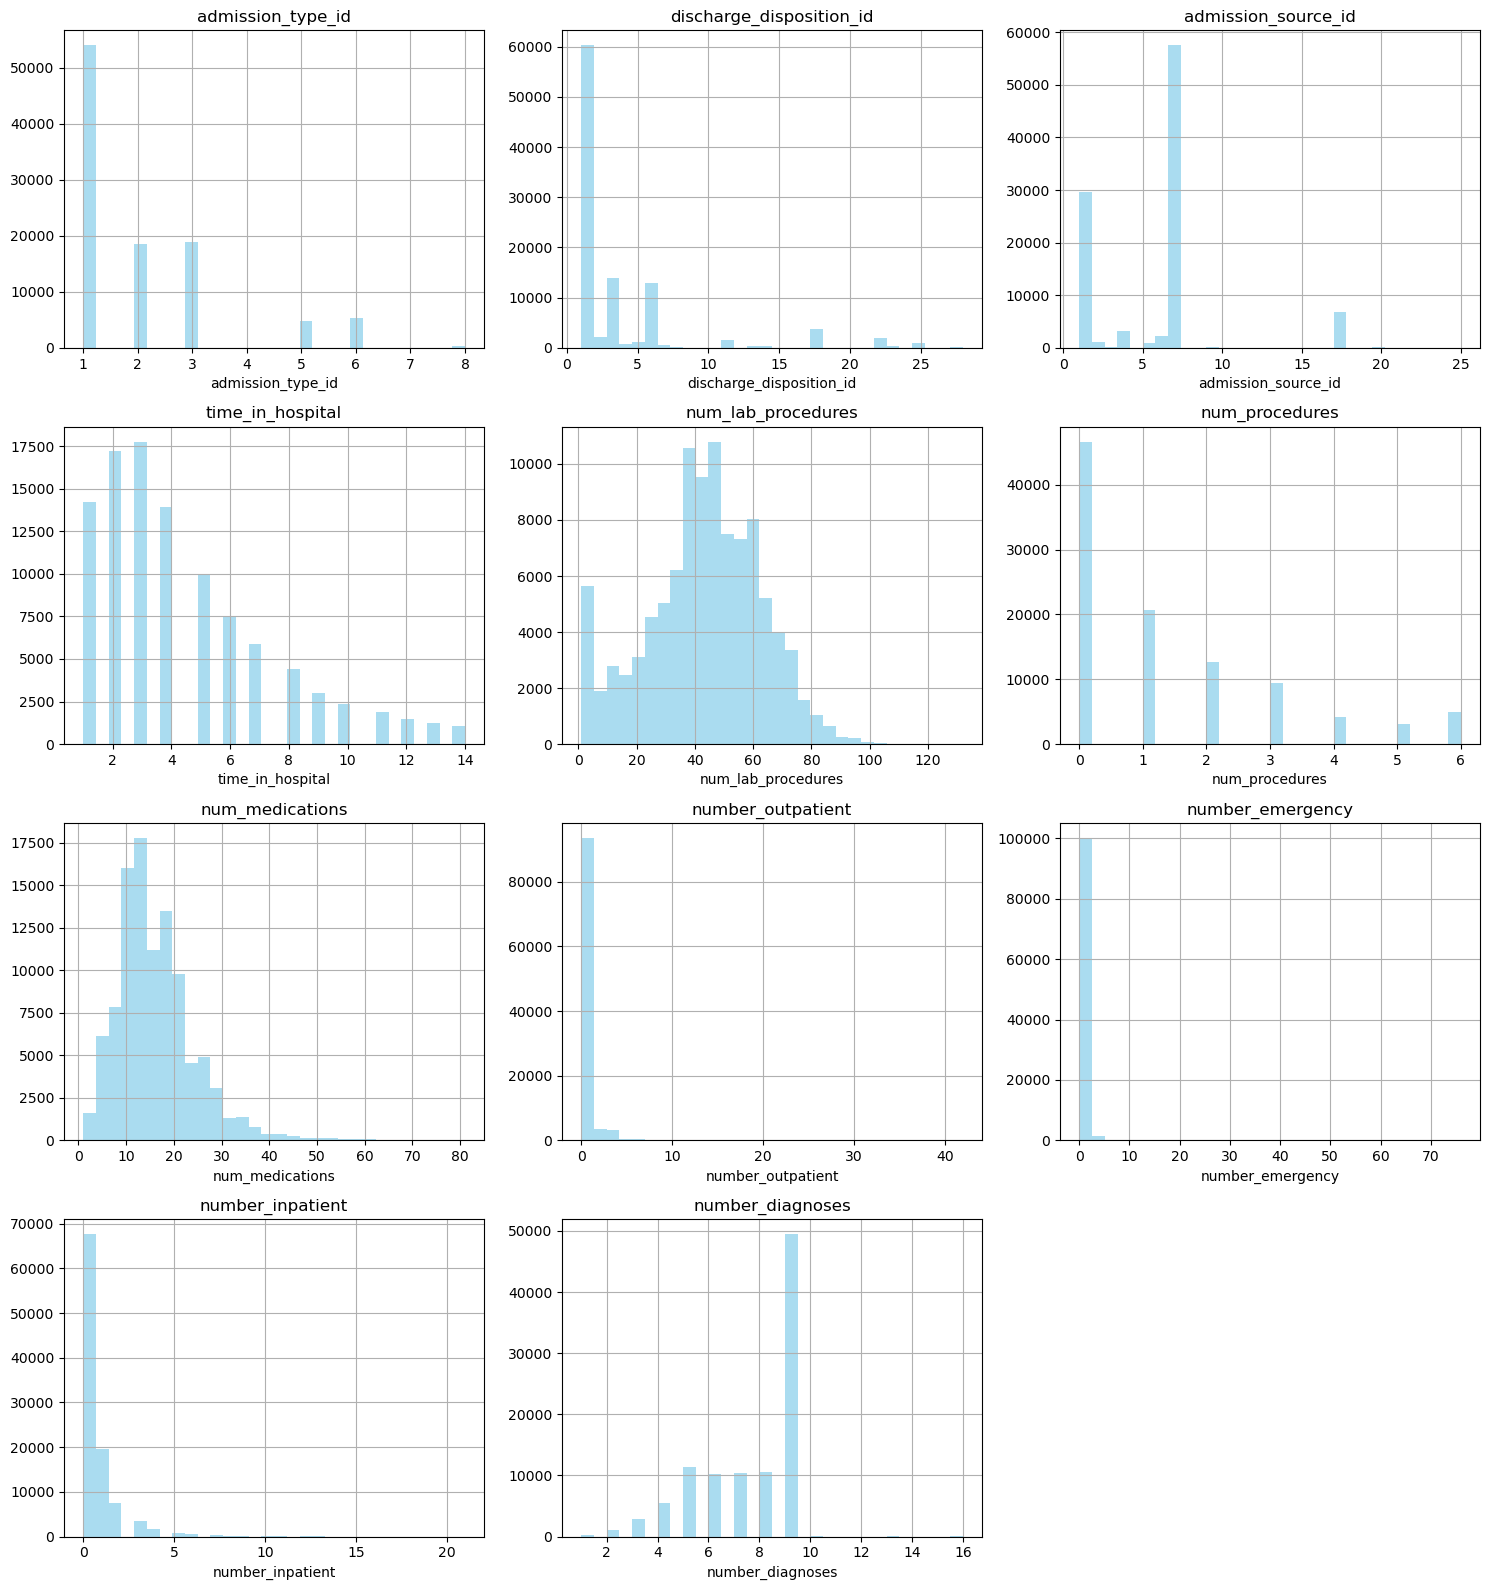

In [5]:
# Numerical feature analysis
def analyze_numeric(df):
    """Analyze numerical features"""
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"Numerical features: {len(numeric_cols)}")
    print(f"Features: {numeric_cols}")
    
    # Basic statistics
    print("\nDescriptive Statistics")
    stats = df[numeric_cols].describe()
    print(stats.round(2))
    
    # Distribution visualization
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
            axes[i].set_title(f'{col}')
            axes[i].set_xlabel(col)
    
    # Hide extra subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return numeric_cols
numeric_features = analyze_numeric(df)


## 5. Categorical Feature Analysis

### 5.1 Categorical Feature Distribution and Unique Value Analysis

Systematically analyze the distribution of all categorical features, count the number of unique values for each feature, and visualize low-cardinality features to understand the distribution patterns of categorical features.


Categorical features: 37

 Unique Value Statistics
                     Feature  Unique Count
27               citoglipton             1
26                   examide             1
35               diabetesMed             2
34                    change             2
33    metformin-pioglitazone             2
32   metformin-rosiglitazone             2
31  glimepiride-pioglitazone             2
30       glipizide-metformin             2
16             acetohexamide             2
24              troglitazone             2
19               tolbutamide             2
36                readmitted             3
25                tolazamide             3
10                 A1Cresult             3
1                     gender             3
9              max_glu_serum             3
28                   insulin             4
23                  miglitol             4
29       glyburide-metformin             4
22                  acarbose             4
21             rosiglitazone             4
18 

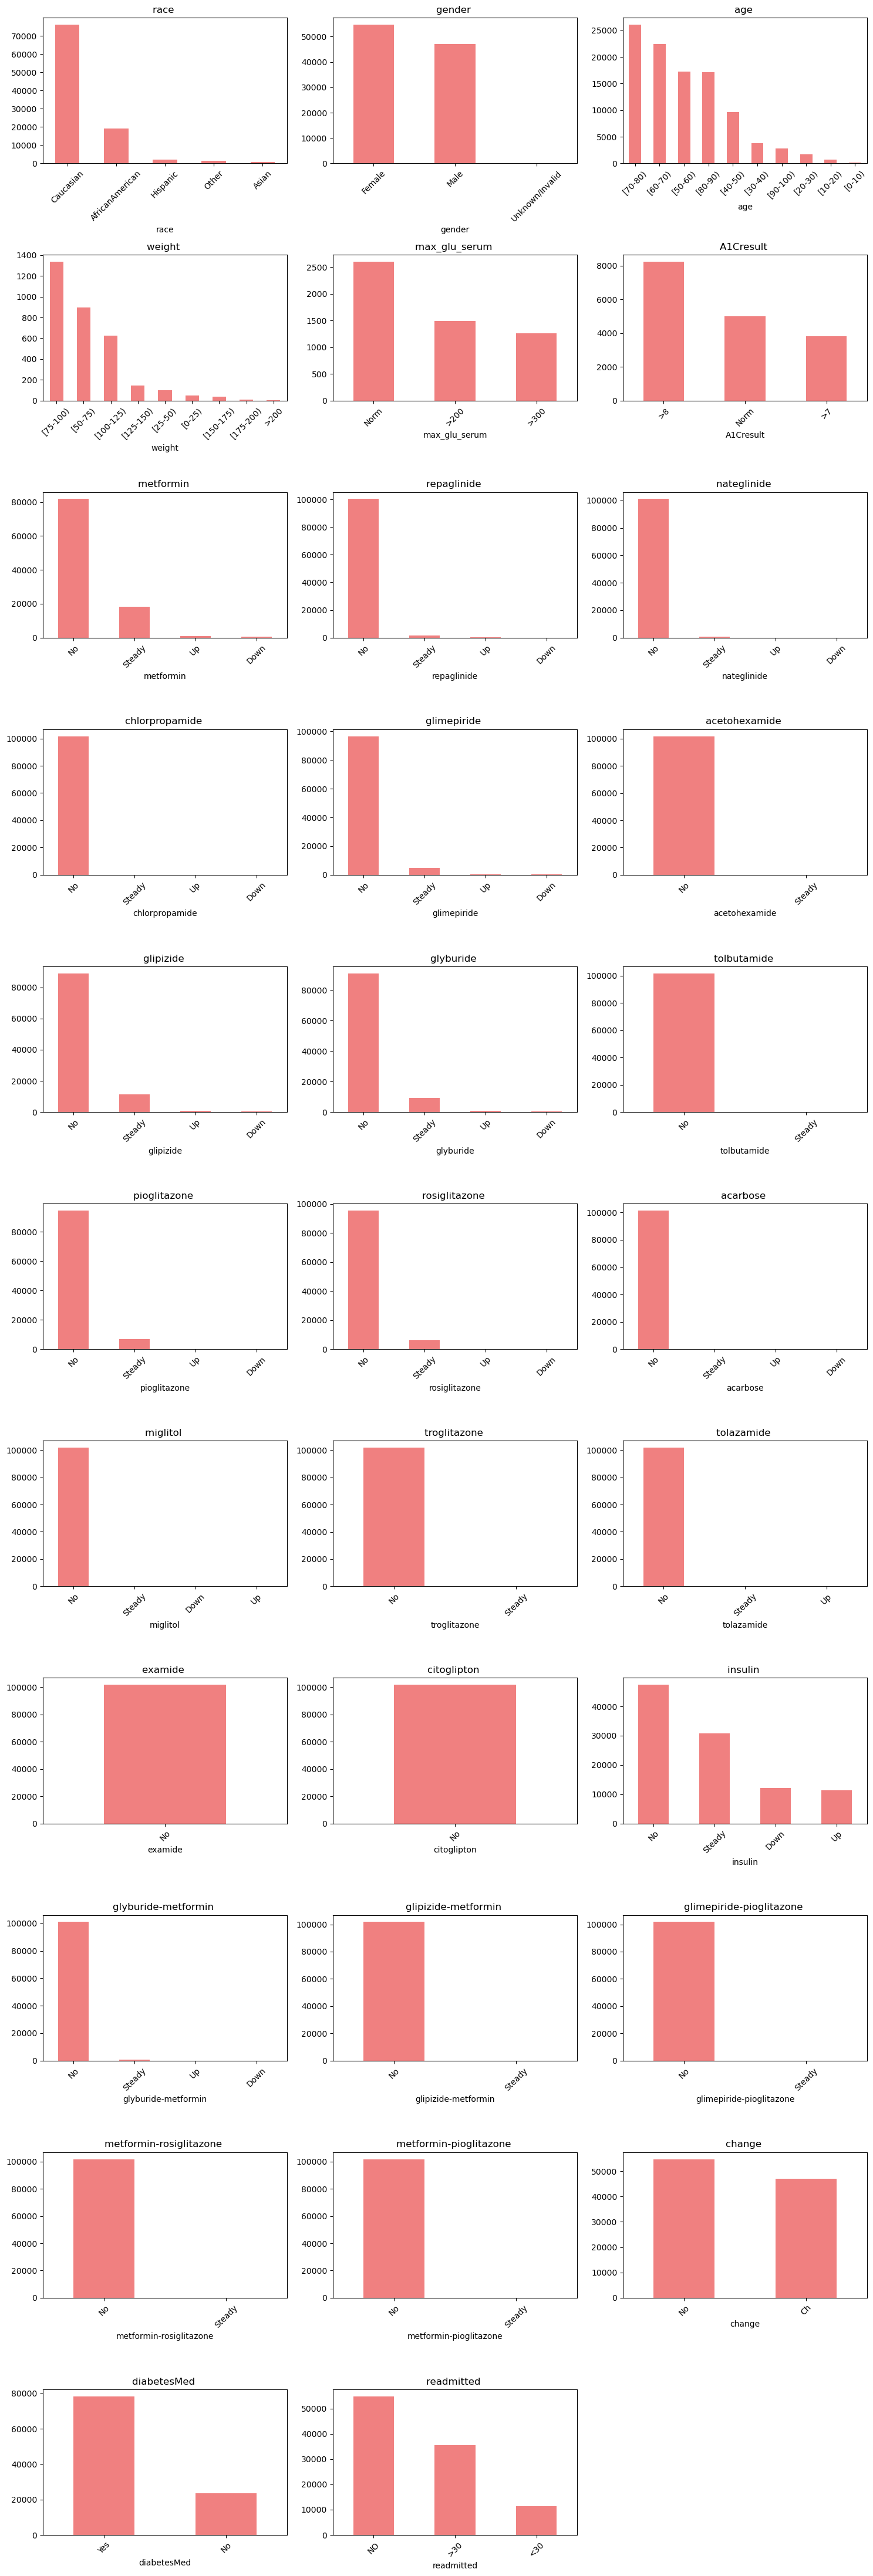

In [6]:
# Categorical feature analysis
def analyze_categorical(df):
    """Analyze categorical features"""
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Categorical features: {len(categorical_cols)}")
    
    # Unique value statistics
    unique_counts = {col: df[col].nunique() for col in categorical_cols}
    unique_df = pd.DataFrame(list(unique_counts.items()), 
                           columns=['Feature', 'Unique Count']).sort_values('Unique Count')
    
    print("\n Unique Value Statistics")
    print(unique_df)
    
    # Select low-cardinality features for visualization
    low_cardinality = [col for col in categorical_cols if df[col].nunique() <= 10]
    
    if low_cardinality:
        n_cols = min(3, len(low_cardinality))
        n_rows = (len(low_cardinality) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for i, col in enumerate(low_cardinality):
            if i < len(axes):
                df[col].value_counts().plot(kind='bar', ax=axes[i], color='lightcoral')
                axes[i].set_title(f'{col} ')
                axes[i].tick_params(axis='x', rotation=45)
        
        # Hide extra subplots
        for i in range(len(low_cardinality), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    return categorical_cols, unique_df

categorical_features, unique_info = analyze_categorical(df)


## 6. Feature Correlation Analysis

### 6.1 Numerical Feature Correlation Matrix

Calculate the correlation coefficient matrix between numerical features, visualize the correlation relationships between features through heatmaps, and identify highly correlated feature pairs to provide basis for feature selection.


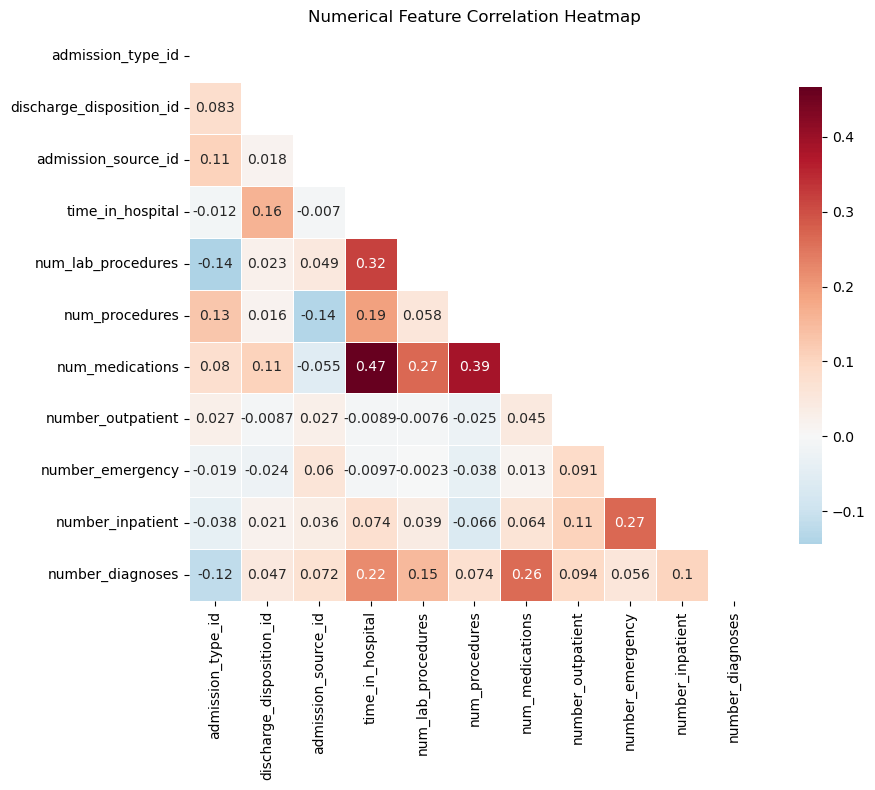


No highly correlated feature pairs found


In [7]:
# Correlation analysis
def analyze_correlations(df, numeric_cols):
    """Analyze feature correlations"""
    if len(numeric_cols) < 2:
        print("Insufficient numerical features, skipping correlation analysis")
        return
    
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Visualize correlation heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Numerical Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_val
                ))
    
    if high_corr_pairs:
        print("\nHighly Correlated Feature Pairs (|r| > 0.7)")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"{feat1} - {feat2}: {corr:.3f}")
    else:
        print("\nNo highly correlated feature pairs found")
    
    return corr_matrix

correlation_matrix = analyze_correlations(df, numeric_features)


## 7. Feature-Target Relationship Analysis

### 7.1 Impact of Key Features on Readmission Status

Analyze the relationship between key features and the target variable `readmitted`, exploring the impact patterns of different feature values on patient readmission status through cross-tabulation analysis and stacked bar chart visualization.


Analyzing 6 key features vs target variable relationship


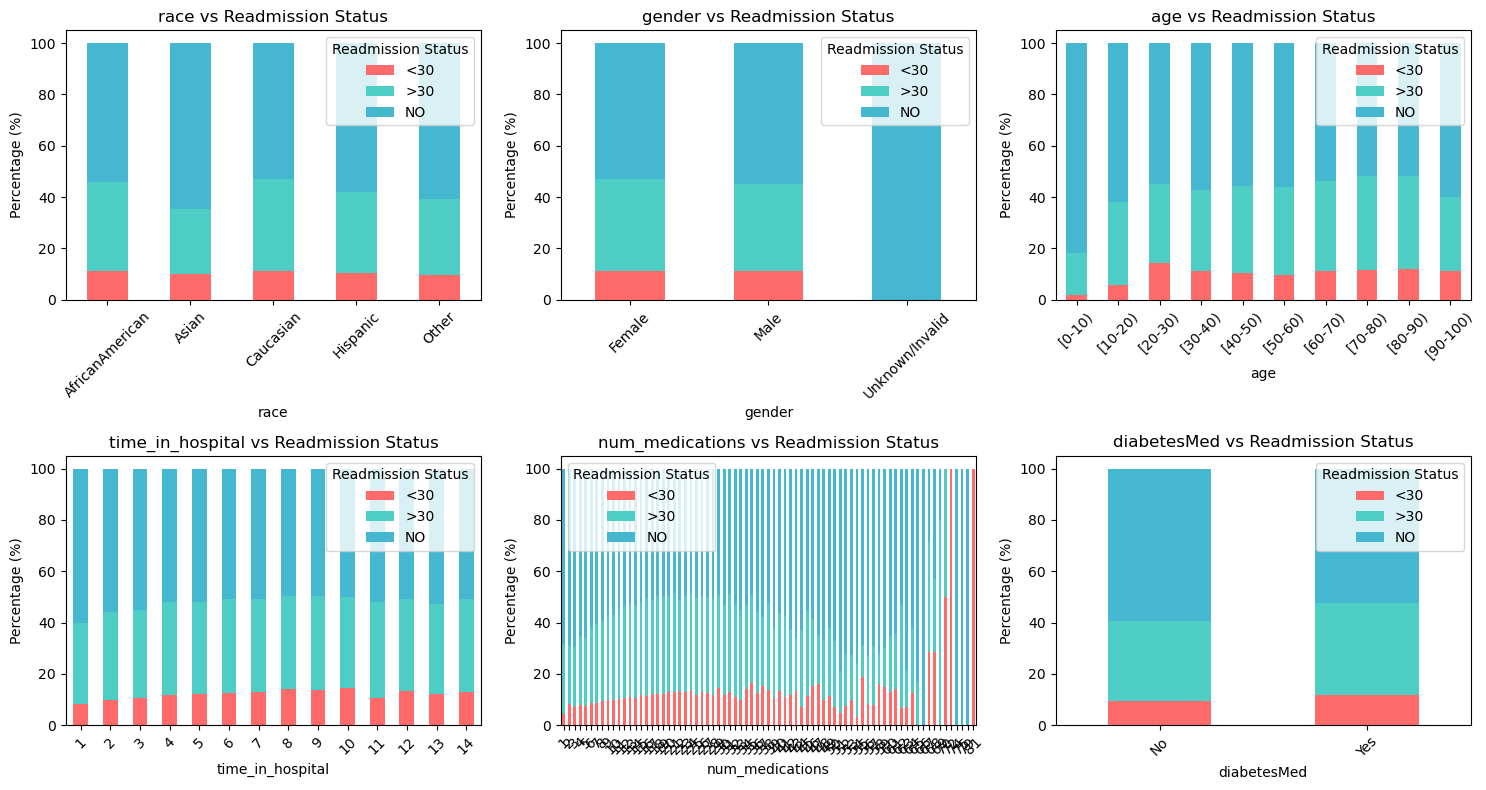

In [8]:
# Feature-target relationship analysis
def analyze_feature_target_relationship(df, key_features=None):
    """Analyze the relationship between features and target variable"""
    if key_features is None:
        # Select important features
        key_features = ['race', 'gender', 'age', 'time_in_hospital', 
                       'num_medications', 'diabetesMed']
        key_features = [f for f in key_features if f in df.columns]
    
    print(f"Analyzing {len(key_features)} key features vs target variable relationship")
    
    # Visualization
    n_cols = min(3, len(key_features))
    n_rows = (len(key_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, feature in enumerate(key_features):
        if i < len(axes):
            # Create cross-tabulation
            crosstab = pd.crosstab(df[feature], df['readmitted'], normalize='index') * 100
            
            # Draw stacked bar chart
            crosstab.plot(kind='bar', stacked=True, ax=axes[i], 
                         color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
            axes[i].set_title(f'{feature} vs Readmission Status')
            axes[i].set_ylabel('Percentage (%)')
            axes[i].legend(title='Readmission Status')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide extra subplots
    for i in range(len(key_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return key_features

important_features = analyze_feature_target_relationship(df)


## 8. Data Quality Assessment and Summary

### 8.1 EDA Analysis Summary and Recommendations

Comprehensive evaluation of data quality, summary of analysis results, assessment of key indicators such as data completeness and balance, and specific recommendations for subsequent data preprocessing and modeling.


## Conclusions and Next Steps

### Key Findings

Through this exploratory data analysis, we have gained the following key insights:

1. **Data Scale**: The dataset contains 101,766 samples and 50 features, with a moderate scale suitable for machine learning modeling
2. **Target Variable Distribution**: Readmission status shows an imbalanced distribution, requiring attention to class imbalance issues
3. **Data Quality**: There is a certain proportion of missing values that require appropriate preprocessing strategies
4. **Feature Diversity**: Contains both numerical and categorical features, requiring different encoding and standardization strategies

### Next Steps Recommendations

1. **Data Preprocessing**: Handle missing values, outlier detection and processing
2. **Feature Engineering**: Categorical variable encoding, numerical variable standardization, feature selection
3. **Model Selection**: Consider classification algorithms that handle class imbalance
4. **Model Evaluation**: Use appropriate evaluation metrics (such as F1-score, AUC, etc.)

### Technical Notes

This analysis report uses the Python ecosystem for data analysis, with main tools including:
- **Data Processing**: pandas, numpy
- **Visualization**: matplotlib, seaborn  
- **Data Acquisition**: ucimlrepo
- **Analysis Environment**: Jupyter Notebook

All code adopts a functional programming style to ensure code readability, maintainability, and reusability.


In [9]:
# EDA Summary
def eda_summary(df, numeric_features, categorical_features, target_dist):
    """EDA Analysis Summary"""
    print("EDA Analysis Summary")
    print("=" * 50)
    
    print(f"Dataset Scale: {df.shape[0]:,} samples × {df.shape[1]} features")
    print(f"Numerical Features: {len(numeric_features)}")
    print(f"Categorical Features: {len(categorical_features)}")
    
    # Missing value statistics
    total_missing = df.isnull().sum().sum()
    missing_pct = (total_missing / (len(df) * len(df.columns))) * 100
    print(f"Missing Values: {total_missing:,} ({missing_pct:.2f}%)")
    
    # Target variable distribution
    print(f"\nTarget Variable Distribution:")
    for category, count in target_dist.items():
        pct = (count / len(df)) * 100
        print(f"  {category}: {pct:.1f}%")
    
    # Data quality assessment
    print(f"\nData Quality Assessment:")
    print(f"  Completeness: {'Good' if missing_pct < 5 else 'Needs Processing'}")
    print(f"  Balance: {'Imbalanced' if target_dist.max() / target_dist.sum() > 0.7 else 'Relatively Balanced'}")
    
    print(f"\nNext Steps Recommendations:")
    print("  1. Handle missing values")
    print("  2. Feature engineering (encoding, standardization)")
    print("  3. Feature selection")
    print("  4. Model training and evaluation")

eda_summary(df, numeric_features, categorical_features, target_dist)


EDA Analysis Summary
Dataset Scale: 101,766 samples × 48 features
Numerical Features: 11
Categorical Features: 37
Missing Values: 374,017 (7.66%)

Target Variable Distribution:
  NO: 53.9%
  >30: 34.9%
  <30: 11.2%

Data Quality Assessment:
  Completeness: Needs Processing
  Balance: Relatively Balanced

Next Steps Recommendations:
  1. Handle missing values
  2. Feature engineering (encoding, standardization)
  3. Feature selection
  4. Model training and evaluation
